### CA1 MATHEMATICS FOR AI : QUESTION 1 - DAIRY DATASET

### IMPORT PYTHON MODULES AND LIBRARIES

In [1]:
# Import the required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker

### IMPORTING AND VIEWING THE DAIRY DATASET

In [2]:
# Importing the dairy dataset from the Datasets folder
data = pd.read_excel('Datasets/dairy_nutrition_8.xlsx');
# Printing the first 5 rows of the dataset
data.head()

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,Cheese,"Cheese food, cold pack, American",19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,Cream,"Cream, whipped, cream topping, pressurized",3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,Ice cream,"Fat free ice cream, no sugar added, flavors ot...",4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,Milk,"Milk, whole, 3.25% milkfat, with added vitamin D",3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,Milk,"Milk, whole, 3.25% milkfat, without added vita...",3.15,3.27,4.78,5.05,46,0.036,0.45,113


### VIEWING THE INFORMATION OF THE DATASET

In [3]:
# Viewing the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         167 non-null    object 
 1   Description  167 non-null    object 
 2   Protein_g    167 non-null    float64
 3   Fat_g        167 non-null    float64
 4   Carb_g       167 non-null    float64
 5   Sugar_g      167 non-null    float64
 6   VitA_mcg     167 non-null    int64  
 7   VitB6_mg     167 non-null    float64
 8   VitB12_mcg   167 non-null    float64
 9   Calcium_mg   167 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 13.2+ KB


### DATA WRANGLING FOR DAIRY DATASET

In [4]:
# Rename the value 'Yogurt' to 'Yoghurt'
data = data.replace(to_replace='Yogurt', value='Yoghurt')

# Verify if replacement was successful
print(data['Type'].unique())

['Cheese' 'Cream' 'Ice cream' 'Milk' 'Yoghurt']


### REDUCING THE DATASET TO REMOVE NON-CONTINUOUS VARIABLES

In [5]:
# Dealing with non-continuous variables in the dataset
data_reduced = data.iloc[:, 2:]
# Showing the first 5 rows of the reduced dataset
data_reduced.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,3.15,3.27,4.78,5.05,46,0.036,0.45,113


### SCALING THE DATASET FOR PCA : PRINCIPAL COMPONENT ANALYSIS

In this dataset, Principal Component Analysis should be done with reference to a correlation matrix as the variables have different scale of values and magnitudes, so scaling ensures that the presence of outliers does not distort the results of PCA and prevents variables with larger variances from dominating the analysis.

In [6]:
# Scaling the data before doing PCA (Principal Component Analysis)
data_reduced = pd.DataFrame(scale(data_reduced), columns = ['Protein_g','Fat_g','Carb_g','Sugar_g','VitA_mcg','VitB6_mg','VitB12_mg','Calcium'])
# Show the first 5 rows of the reduced dataset
data_reduced.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mg,Calcium
0,0.706396,0.939983,-0.236074,-0.646114,-0.940535,0.821712,0.506963,0.384676
1,-0.896030,0.756660,0.068353,0.022635,0.506329,-0.387966,-0.657959,-0.776833
2,-0.778233,-1.061831,1.196266,0.091182,0.083044,-0.533128,-0.387321,-0.641911
3,-0.900897,-0.795850,-0.493049,-0.223966,-0.586515,-0.448450,-0.469689,-0.741636
4,-0.900897,-0.794214,-0.494509,-0.223966,-0.586515,-0.448450,-0.469689,-0.741636


### IMPLEMENTING PCA USING SKLEARN LIBRARIES AND CENTERING DATA

In [7]:
# Implementing PCA using SKLearn
pca = PCA(n_components=8).fit(data_reduced)
# pca.transform() returns scores based on centered data
pca_samples = pca.transform(data_reduced)
print(pca_samples)

[[ 0.90574495 -0.49213556  0.78689251 ...  0.11055761  0.15903593
   0.02905864]
 [-0.80915726 -0.33017572 -1.26218316 ...  0.18057799 -0.10731855
   0.09479982]
 [-1.24296614  1.06533077 -0.30132095 ...  0.35052011  0.69005462
   0.24481461]
 ...
 [-1.54884853  0.37213022  0.67113113 ...  0.30418192  0.59408556
   0.36000265]
 [-1.78607419 -0.02771987  0.61351722 ... -0.0077464  -0.27986427
   0.012993  ]
 [-0.27478342 -1.67745329 -2.40389456 ...  0.2977525  -0.27600603
  -0.00356428]]


### COMPUTING AND RETRIEVING RESULTS OF PCA

Based on the PCA result table, only the first three principal components were extracted because :
1.	Look at the Eigenvalues - Based on Kaiser’s rule, we should only retain PCs whose eigenvalues are greater than 1. Thus, only the first two PCs should be extracted, as the other 6 PCs have eigenvalues lower than 1.
 
 
2.	Look at the percentage of total variance – Based on this guideline, with our intention of our PCA to lead to further analysis, we should retain PCs with a cumulative percentage 80-90% for further analysis. From the table, the first three PCs accounts for 84.8% of total variance, hence this guideline indicates that 3 PCs should be extracted.
 
 
3.	Look at a scree plot – From the plot, we can identify that the inflection point ‘elbow’ in the plot is at PC3, where the graph begins to flatten. Hence, this plot indicates that we should retain and extract the first two PCs to the left of the inflection point.
 

- Upon evaluation of the above three guidelines, I decided to extract and retain two PCs.
- Although the values from the cumulative variance explained indicated that 3 PCs was necessary to achieve 80-90% for further analysis, but this guideline does not consider the practical significance and interpretability of the extracted PCs and assumes that all variables are equally important to the variance in the dataset.
- However, Kaiser’s rule and the scree plot indicated that extracting 2 PCs would be more appropriate to capture a significant portion of variance in the dataset. 


- So, by extracting two PCs, it allows for a comprehensive representation of the ‘Dairy’ data and retain sufficient information, effectively summarizing the key patterns and relationships present among the nutritional variables in the dataset.


In [8]:
# Compute the PCs and percentage variance explained
# Pass original and returns of PCA

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA Components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions
    
    # PCA Eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions
    
    # PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1) 
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance']) 
    cum_variance_ratios.index = dimensions
    
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

In [9]:
# Print the PCA results
results = pca_results(data_reduced, pca)
results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mg,Calcium
PC 1,3.7425,0.4650,0.4650,0.4734,0.2935,0.0550,0.0792,0.3641,0.3609,0.4424,0.4710
PC 2,2.1631,0.2688,0.7338,-0.1058,-0.3245,0.6230,0.6058,-0.1766,0.2494,0.1693,-0.0796
PC 3,0.9173,0.1140,0.8478,0.1581,-0.5733,-0.2880,-0.3350,-0.4780,0.3482,0.2988,0.1104
PC 4,0.4739,0.0589,0.9066,-0.3451,-0.0490,-0.0872,-0.1739,0.4780,0.6570,-0.0348,-0.4235
PC 5,0.3313,0.0412,0.9478,0.0020,-0.6678,-0.0642,0.0471,0.6112,-0.3752,0.0599,0.1725
PC 6,0.1957,0.0243,0.9721,-0.2056,0.1356,0.2290,-0.3145,0.0126,-0.3279,0.7589,-0.3230
PC 7,0.1452,0.0180,0.9902,0.3807,-0.1046,0.6441,-0.5630,0.0612,0.0265,-0.3223,-0.0630
PC 8,0.0792,0.0098,1.0000,-0.6583,0.0464,0.2168,-0.2570,-0.0418,0.0753,-0.0423,0.6650


### PLOTTING THE SCREEPLOT

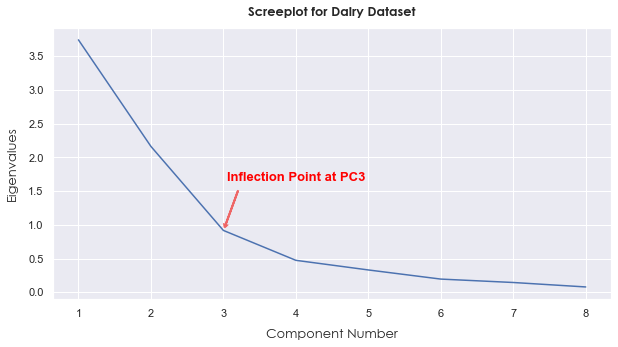

In [10]:
# Plot Scree Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.set_xlabel('Component Number', fontname='Century Gothic', fontsize=13, labelpad=10)
ax.set_ylabel('Eigenvalues', fontname='Century Gothic', fontsize=13, labelpad=10)
ax.set_title('Screeplot for Dairy Dataset', fontname='Century Gothic', fontsize=13, y=1.02, fontweight='bold')
ax.arrow(3.2, 1.5,-0.17,-0.5, head_width=0.04, head_length=0.04, linewidth=2, color='#ee6666')
ax.text(4, 1.7,'Inflection Point at PC3', color='red', ha='center', va='center', fontsize=13,fontdict={'fontweight':'bold'})
plt.show()

### OBTAIN SCORES OF PCA FROM UNCENTERED DATA

In [11]:
# Obtain scores from original data that are not centered

# Extract only the first 2 PCs
pca2 = PCA(n_components = 2).fit(data_reduced)
scores3 = pca.transform(data_reduced)

scores_notcentered = np.dot(data_reduced, pca2.components_.T)
scores_notcentered = pd.DataFrame(scores_notcentered, columns = ['PC1', 'PC2'])

# Print the scores
scores_notcentered.head()

,PC1,PC2
0,0.905745,-0.492136
1,-0.809157,-0.330176
2,-1.242966,1.065331
3,-1.637500,-0.117987
4,-1.637100,-0.119428


### PLOTTING THE LOADING PLOT FOR PC1 AND PC2

Define : z1 = Protein_g, z2 = Fat_g, z3 = Carb_g, z4 = Sugar_g, z5 = VitA_mcg, z6 = VitB6_mg, z7 = VitB12_mcg and z8 = Calcium_mg

Equations for PC1 and PC2 :
- PC1: y1 = 0.4734z1 + 0.2935z2 + 0.0550z3 + 0.0792z4 + 0.3641z5 + 0.3609z6 + 0.4424z7 + 0.4710z8 
- PC2: y2 = -0.1058z1 - 0.3245z2 + 0.6230z3 + 0.6058z4 - 0.1766z5 + 0.2494z6 + 0.1693z7 - 0.0796z8 

Analysis of PC1 :
- The loadings of Carbs, Sugar, Fat, Protein, VitA, VitB6, VitB12 and Calcium all have positive loadings. Protein has the strongest positive loading of 0.47, but Carbs has the weakest positive loading of 0.055.

- For PC1 to be positive, the product must have above-average values for Carbs, Sugar, Fat, VitA, VitB6, VitB12 and an even stronger positive effect for Protein and Calcium.

- However, for PC1 to be negative, the product must have below-average values for Carbs, Sugar, Fat, VitA, VitB6, VitB12, and an even stronger negative effect for Protein and Calcium.
 
- Thus, PC1 seems to measure a weighted average of the overall nutrient content in dairy products, and does not differentiate between contrasting nutrient profiles.

Analysis of PC2 :
- The loadings of Calcium, Protein, Fat and VitA have negative loadings of weak strength, and is opposite in sign to all the other loadings in PC2 with weak to moderate strengths.Of the positive variables, Carbs have the strongest positive loading of 0.6230.

- For PC2 to be positive, the product must have below-average values for Calcium, Protein, Fat and VitA, and above-average values for all other variables.

- However, for PC2 to be negative, the product must have above-average values for Calcium, Protein, Fat and VitA, and below-average values for all other variables.

- Thus, PC2 seems to measure a contrast between Calcium, Protein, Fat and VitA against all the other variables, capturing the difference in nutrient composition between specific nutrients.

In [12]:
# Plotting the loading plot
# Pass original data and returns of PCA to this function

# ------------ Loading Plot 1 - PC1 and PC2 ------------------------------

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.1

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12, fontname='Century Gothic')

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=13, labelpad=10, fontname='Century Gothic')
    ax.set_ylabel("PC2", fontsize=13, labelpad=10, fontname='Century Gothic')
    ax.set_title("Loading Plot on Dairy Between PC1 and PC2", fontsize = 14, y=1.02, fontname='Century Gothic', fontweight='bold')
    
    return ax

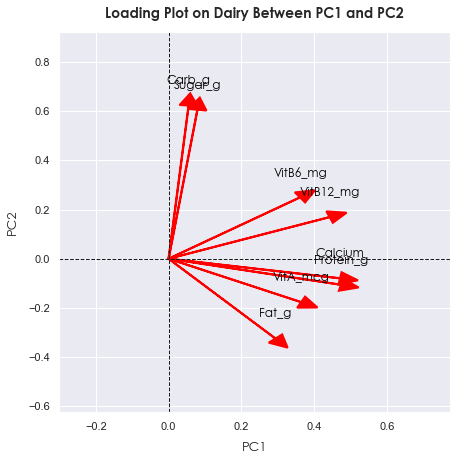

In [13]:
# Show the loading plot
loadingplot(data_reduced, pca2, width=7,height=7, margin=0.3)
plt.show()

### PLOTTING THE SCORE PLOT WITH DATA LABELS

In [14]:
# Plot score plot with data labels
# Pass original data, uncentered scores and returns of PCA to this function

# ------------ Score Plot 1 - PC1 and PC2 ------------------------------

def scoreplot(data, scores, pca, width=5, height=5, margin=0.5):
    
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores, hue = data["Type"], s=80, edgecolor='black', alpha=0.9)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score Plot for Dairy Dataset", fontsize=15, fontname='Century Gothic', fontweight='bold', y=1.02)
    
    ax.set_xlabel("PC1", fontsize=13, labelpad=11, fontname='Century Gothic')
    ax.set_ylabel("PC2", fontsize=13, labelpad=11, fontname='Century Gothic')
    
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    legend = plt.legend(title='Type', frameon=False, fontsize=13)
    legend.get_title().set_fontsize(13)
    
    return ax

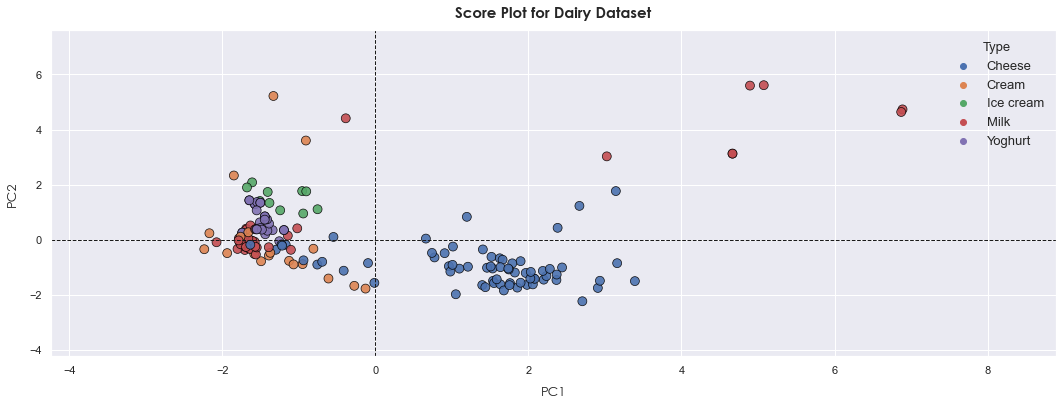

In [15]:
scoreplot(data, scores_notcentered, pca2, width=18, height=6, margin=2)
plt.show()

### ANALYSIS OF THE SCORE PLOT
1 b) (i)
- Low carbohydrates and sugar but high in other nutrients.
- The product(s) that meets the following attributes above must have an average PC1 score and a negative PC2 score.
- Thus, the dairy product that fulfills both conditions of having a negative PC1 and PC2 score is Cream, Cheese and Milk indicating it has low carbohydrates and sugar but is high in other nutrients.

1 b) (ii)
- High carbohydrates and sugar but low in other nutrients.
- The product(s) that meets the following attributes above must have a negative PC1 score, and a high positive PC2 score.
- Thus, the dairy product(s) with high carbohydrates and sugar but low in other nutrients is Ice Cream and Yoghurt, with negative PC1 score and a positive PC2 score.

### OBTAINING THE Z-SCORE FOR PRODUCT IDENTIFICATION

In [16]:
# Create a copy of the dataset
data_copy = data.copy()

# Drop columns with non-continuous variables
data_copy.drop(['Type','Description'], axis = 1, inplace = True)

# Display the first 5 rows of the copied data
data_copy.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,3.15,3.27,4.78,5.05,46,0.036,0.45,113


### SCALING THE DATASET AND STORING VALUES
### DAIRY PRODUCT 1

In [17]:
# Scaling the values for Product 1 
scaler = StandardScaler()
data_copy1 = scaler.fit_transform(data_copy) 

In [18]:
# Creating an array to store values given
dairy_array = np.array([22.17, 22.35, 2.22, 1.01, 181, 0.034, 2.28, 505]).reshape(1,-1)
# Scale the array
dairy_array = scaler.transform(dairy_array)
# Print the array
print(dairy_array)

[[ 0.95075138  0.76729945 -0.68139926 -0.56168465  0.45245611 -0.47264379
   1.68365192  0.40814055]]


C:\Users\dario\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Z-Score Values for Product 1:
 [[ 1.52462561 -1.05959125]]


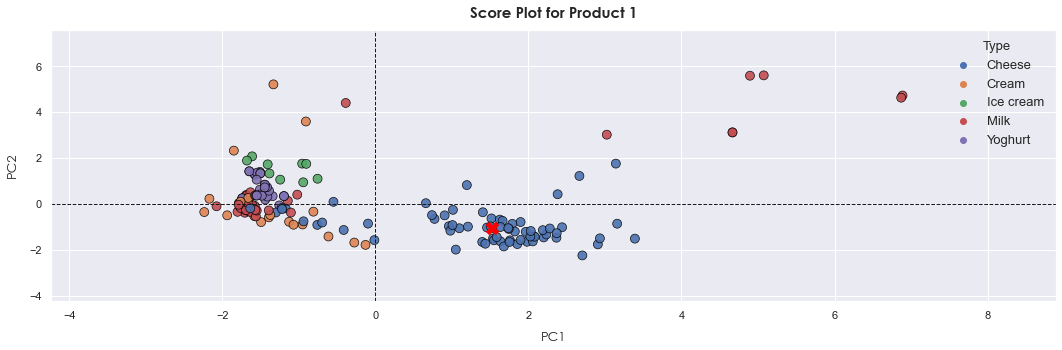

In [19]:
# Obtain the z-score for the score plot
z_score1 = np.dot(dairy_array, pca2.components_.T)
print("Z-Score Values for Product 1:\n",z_score1)

scoreplot(data, scores_notcentered, pca2, width=18, height=5, margin=2)
plt.title("Score Plot for Product 1", fontsize=15, fontname='Century Gothic', fontweight='bold', y=1.02)
plt.plot(z_score1[:, 0], z_score1[:, 1], 'x', color='red', markersize=10, markeredgewidth=5)  
plt.show()

### DAIRY PRODUCT 2

In [20]:
# Scaling the values for Product 2
scaler = StandardScaler()
data_copy2 = scaler.fit_transform(data_copy)

In [21]:
# Creating an array to store values given
dairy_array2 = np.array([4.32, 1.42, 23.0, 14.58, 13, 0.047, 0.53, 114]).reshape(1,-1)
# Scale the array
dairy_array2 = scaler.transform(dairy_array2)
# Print the array
print(dairy_array2)

[[-0.78699477 -0.94561822  0.83562588  0.57268198 -0.84048631 -0.3153856
  -0.37555408 -0.73870313]]


C:\Users\dario\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Z-Score Values for Product 2:
 [[-1.49279651  1.32264242]]


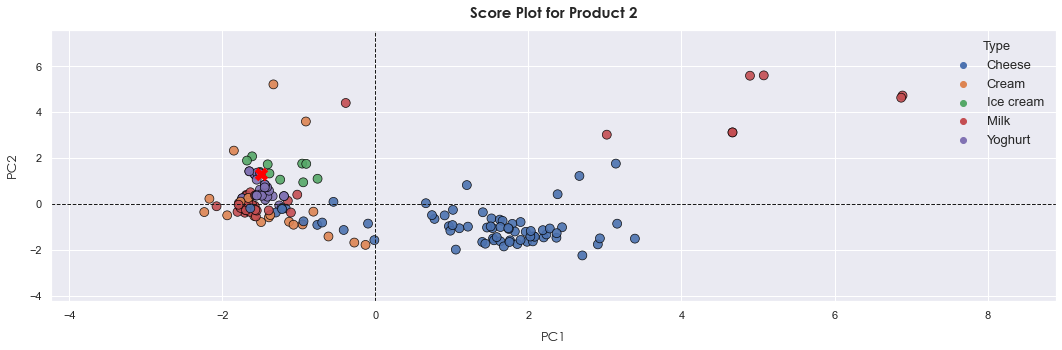

In [22]:
# Obtain the z-score for the score plot
z_score2 = np.dot(dairy_array2, pca2.components_.T)
print("Z-Score Values for Product 2:\n",z_score2)

scoreplot(data, scores_notcentered, pca2, width=18, height=5, margin=2)
plt.title("Score Plot for Product 2", fontsize=15, fontname='Century Gothic', fontweight='bold', y=1.02)
plt.plot(z_score2[:, 0], z_score2[:, 1], 'x', color='red', markersize=10, markeredgewidth=5) 
plt.show()

### IDENTIFYING THE DAIRY PRODUCTS BASED ON Z-SCORE

Product 1 :
- Score Plot : 1.52, -1.06 – Based on these X, Y values, it points to a data point for Cheese.
- So, we can conclude that dairy product 1 is Cheese.

Product 2 :
- Score Plot : -1.49, 1.32 – Based on these X, Y values, it points to a data point for Yoghurt.
- So, we can conclude that dairy product 2 is Yoghurt.